In [16]:
import numpy as np
import os
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram
import qiskit.tools.visualization as qt

In [29]:
simulator = QasmSimulator()

qreg = QuantumRegister(3, 'q')
creg = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg, creg)

In [30]:
circuit.x(qreg[0])
circuit.x(qreg[2])

In [31]:
simulator = Aer.get_backend("aer_simulator")

In [32]:
init = circuit.copy()
init.save_statevector()
statevector = simulator.run(init).result().get_statevector()

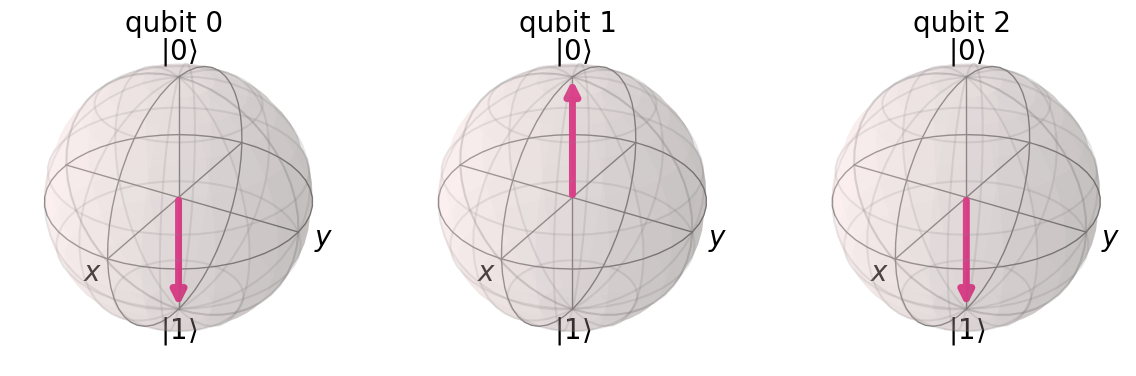

In [33]:
qt.plot_bloch_multivector(statevector)

In [34]:
circuit.h(qreg[2])
circuit.cp(np.pi/4, qreg[0], qreg[2])
circuit.cp(np.pi/2, qreg[1], qreg[2])

In [35]:
circuit.h(qreg[1])
circuit.cp(np.pi/2, qreg[0], qreg[1])

In [36]:
circuit.h(qreg[0])

In [37]:
circuit.swap(qreg[0], qreg[2])

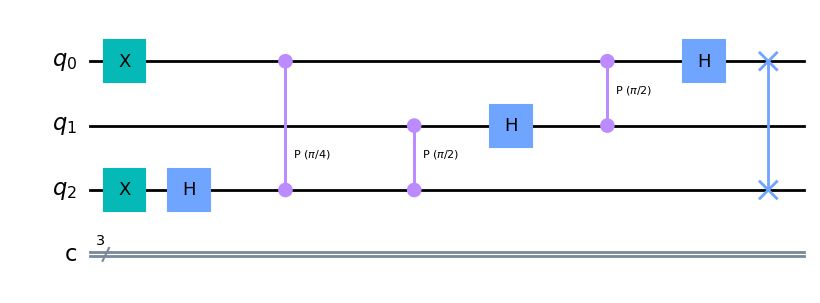

In [38]:
circuit.draw(output='mpl')

In [39]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()

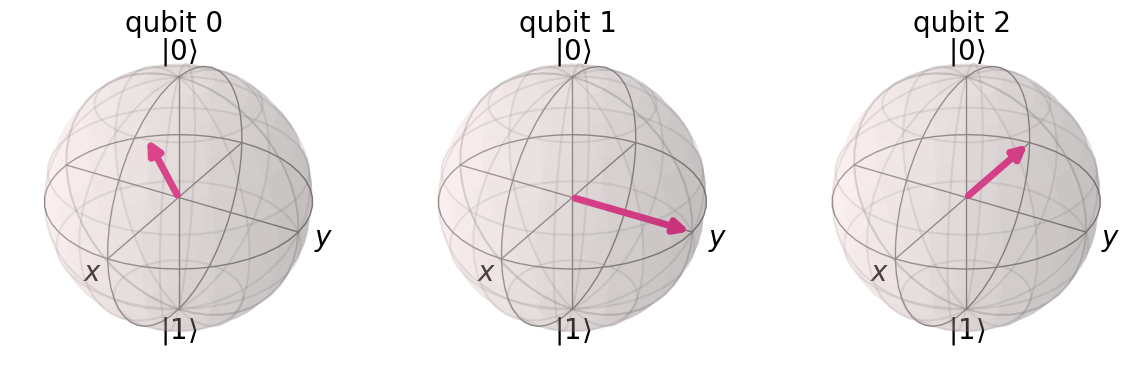

In [40]:
circuit.save_statevector()
statevector = simulator.run(circuit).result().get_statevector()
qt.plot_bloch_multivector(statevector)